In [1]:
%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 8

In [3]:
from kid_readout.measurement.io import nc

In [4]:
ncf_on = nc.NCFile('/data/readout/2016-07-13_104209_magnetic_shield.nc')

In [5]:
ncf_off = nc.NCFile('/data/readout/2016-07-13_122352_magnetic_shield_compressor_off.nc')

In [6]:
ncf_on.node_names()

[u'SweepStreamArray0',
 u'ADCSnap1',
 u'SweepStreamArray2',
 u'ADCSnap3',
 u'SweepStreamArray4',
 u'ADCSnap5',
 u'SweepStreamArray6',
 u'ADCSnap7',
 u'SweepStreamArray8',
 u'ADCSnap9']

In [7]:
ncf_off.node_names()

[u'SweepStreamArray0', u'ADCSnap1']

In [8]:
ssas_on = [ncf_on.read(name) for name in ncf_on.node_names() if name.startswith('SweepStreamArray')]

In [9]:
ssa_off = ncf_off.SweepStreamArray0

In [10]:
from collections import namedtuple
ResonatorData = namedtuple('ResonatorData', field_names=['f_data', 's21_data',
                                                         'f_model', 's21_model',
                                                         'f_r', 's21_r'])

def extract(resonator, normalize, num_model_points):
    f_data = resonator.frequency.copy()
    s21_data = resonator.data.copy()
    f_model = np.linspace(f_data.min(), f_data.max(), num_model_points)
    s21_model = resonator.model.eval(params=resonator.current_params, f=f_model)
    f_r = resonator.f_0
    s21_r = resonator.model.eval(params=resonator.current_params, f=f_r)
    if normalize:
        s21_data = resonator.remove_background(frequency=f_data, s21_raw=s21_data)
        s21_model = resonator.remove_background(frequency=f_model, s21_raw=s21_model)
        s21_r = resonator.remove_background(frequency=f_r, s21_raw=s21_r)
    return ResonatorData(f_data, s21_data, f_model, s21_model, f_r, s21_r)

    
def amplitude(axis, resonator, normalize=False, num_model_points=1000, f_scale=1e-6, three_ticks=True):
    rd = extract(resonator, normalize, num_model_points)
    ax.plot(f_scale * rd.f_data, 20 * np.log10(np.abs(rd.s21_data)), '.b', markersize=2)
    ax.plot(f_scale * rd.f_model, 20 * np.log10(np.abs(rd.s21_model)), '-', color='brown')
    ax.plot(f_scale * rd.f_r, 20 * np.log10(np.abs(rd.s21_r)), '.', color='brown', markersize=3)
    if three_ticks:
        ax.set_xticks(f_scale * np.array([rd.f_data.min(), rd.f_r, rd.f_data.max()]))


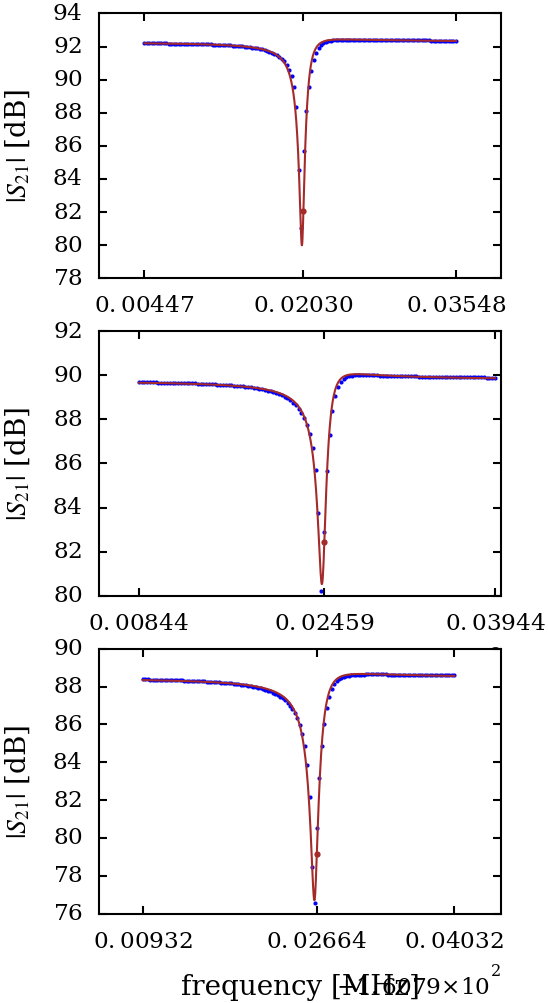

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(2, 5))

for channel_index, ax in zip(range(ssa_off.num_channels), axes.flatten()):
    ax.set_xlabel('frequency [MHz]')
    ax.set_ylabel('$|S_{21}|$ [dB]')
    ss = ssa_off[channel_index]
    amplitude(ax, ss.sweep.resonator)

# Compressor off

In [12]:
def detrend_poly(degree):
    def detrender(y):
        x = np.arange(y.size)
        return y - np.polyval(np.polyfit(x, y, degree), x)
    return detrender

detrend_quadratic = detrend_poly(2)
detrend_cubic = detrend_poly(3)

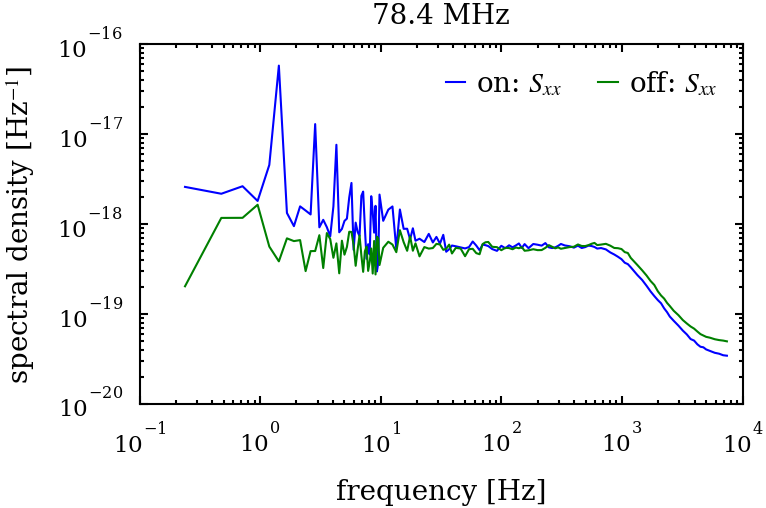

In [24]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

channel_index = 0
atten_index = 3

sss_on = ssas_on[atten_index][channel_index]
sss_on.set_S(detrend=detrend_quadratic, window=plt.mlab.window_none)

sss_off = ssa_off[channel_index]
sss_off.set_S(detrend=detrend_quadratic, window=plt.mlab.window_none)

ax.plot(sss_on.S_frequency, sss_on.S_xx, label='on: $S_{xx}$')
ax.plot(sss_off.S_frequency, sss_off.S_xx, label='off: $S_{xx}$')

ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density [Hz$^{-1}$]')
ax.set_title('{:.1f} MHz'.format(1e-6 * sss_on.sweep.resonator.f_0))
ax.legend(loc='best', fontsize='small', ncol=2);

fig.savefig('2016-07-18_Sxx_compressor_on_and_off.pdf');

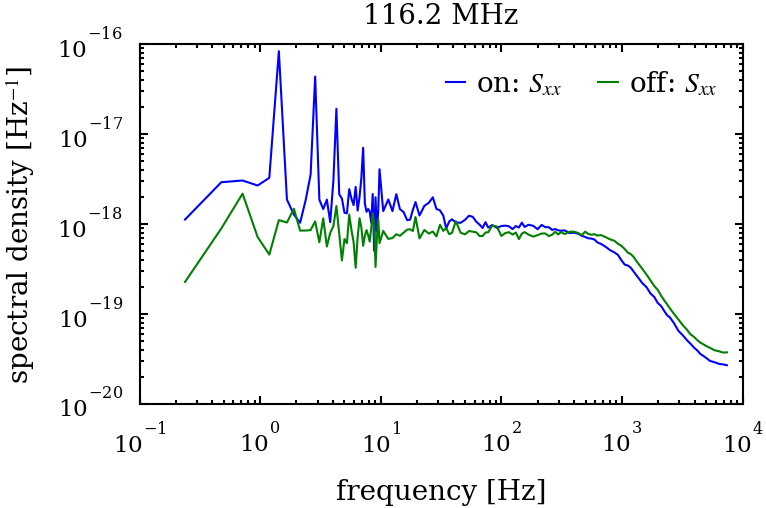

In [21]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

channel_index = 1
atten_index = 3

sss_on = ssas_on[atten_index][channel_index]
sss_on.set_S(detrend=detrend_quadratic, window=plt.mlab.window_none)

sss_off = ssa_off[channel_index]
sss_off.set_S(detrend=detrend_quadratic, window=plt.mlab.window_none)

ax.plot(sss_on.S_frequency, sss_on.S_xx, label='on: $S_{xx}$')
ax.plot(sss_off.S_frequency, sss_off.S_xx, label='off: $S_{xx}$')

ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density [Hz$^{-1}$]')
ax.set_title('{:.1f} MHz'.format(1e-6 * sss_on.sweep.resonator.f_0))
ax.legend(loc='best', fontsize='small', ncol=2);

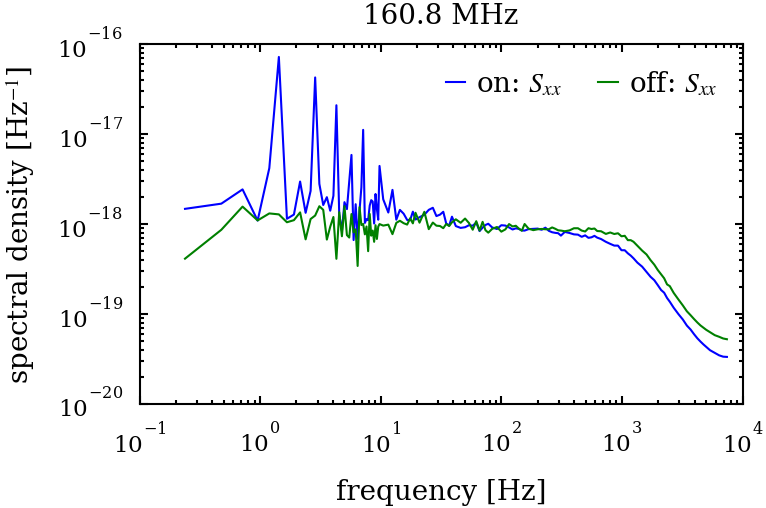

In [15]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

channel_index = 2
atten_index = 3

sss_on = ssas_on[atten_index][channel_index]
sss_on.set_S(detrend=detrend_quadratic, window=plt.mlab.window_none)

sss_off = ssa_off[channel_index]
sss_off.set_S(detrend=detrend_quadratic, window=plt.mlab.window_none)

ax.plot(sss_on.S_frequency, sss_on.S_xx, label='on: $S_{xx}$')
ax.plot(sss_off.S_frequency, sss_off.S_xx, label='off: $S_{xx}$')

ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density [Hz$^{-1}$]')
ax.set_title('{:.1f} MHz'.format(1e-6 * sss_on.sweep.resonator.f_0))
ax.legend(loc='best', fontsize='small', ncol=2);

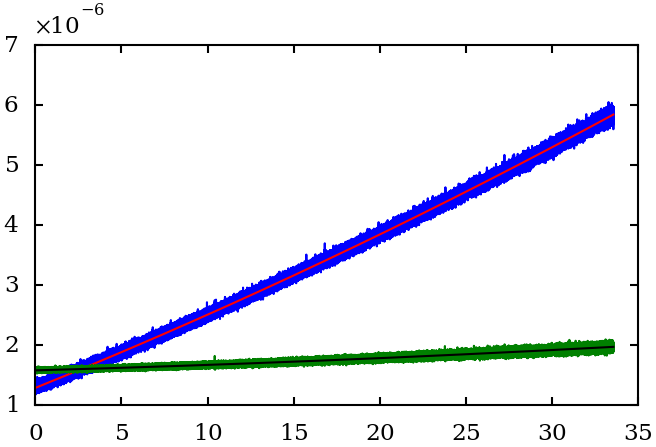

In [16]:
fig, ax = plt.subplots()

ax.plot(sss_off.stream.sample_time, sss_off.x)
x_poly = np.polyfit(x=sss_off.stream.sample_time, y=sss_off.x, deg=2)
ax.plot(sss_off.stream.sample_time, np.polyval(x_poly, sss_off.stream.sample_time), '-r')

ax.plot(sss_off.stream.sample_time, sss_off.y)
y_poly = np.polyfit(x=sss_off.stream.sample_time, y=sss_off.y, deg=2)
ax.plot(sss_off.stream.sample_time, np.polyval(y_poly, sss_off.stream.sample_time), '-k')

# Full-resolution, unbinned noise

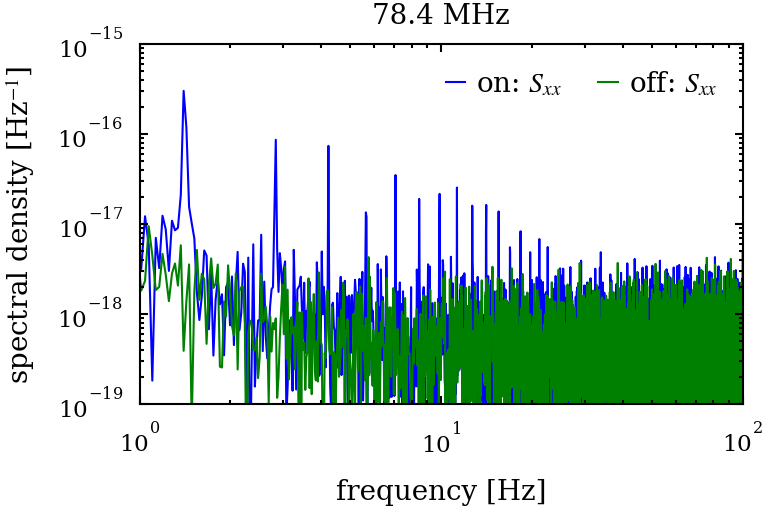

In [25]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

channel_index = 0
atten_index = 3

sss_on = ssas_on[atten_index][channel_index]
sss_on.set_S(binned=False, NFFT=sss_on.stream.s21_raw.size, detrend=detrend_quadratic, window=plt.mlab.window_none)

sss_off = ssa_off[channel_index]
sss_off.set_S(binned=False, NFFT=sss_off.stream.s21_raw.size, detrend=detrend_quadratic, window=plt.mlab.window_none)

ax.plot(sss_on.S_frequency, sss_on.S_xx, label='on: $S_{xx}$')
ax.plot(sss_off.S_frequency, sss_off.S_xx, label='off: $S_{xx}$')

ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density [Hz$^{-1}$]')
ax.set_title('{:.1f} MHz'.format(1e-6 * sss_on.sweep.resonator.f_0))
ax.legend(loc='best', fontsize='small', ncol=2);
ax.set_ylim(1e-19, 1e-15);
ax.set_xlim(1, 100);

fig.savefig('2016-07-18_Sxx_compressor_on_and_off_full-resolution_unbinned.pdf');